# Filtering and Coarse Graining 

### Filtering:
- Gaussian filter
- Box filter
- Spectral Filter

### Coarse graining 
- Spectral space

In [1]:
import numpy as np
from scipy.fftpack import fft2, ifft2
import matplotlib.pyplot as plt
from scipy.io import loadmat

from py2d.initialize import initialize_wavenumbers_2DFHIT
from py2d.convert import Omega2Psi_2DFHIT
from py2d.spectra import spectrum_angled_average_2DFHIT
from py2d.filter import filter2D_2DFHIT

In [2]:
nx = 1024
filename = '../data/ICs/NX' + str(nx) + '/1.mat'
Lx = 2 * np.pi

NCoarse = 128
Delta = 2*Lx/NCoarse

filter_types = ['spectral-circle', 'spectral-square', 'gaussian', 'box']  # Define filter types

Kx, Ky, Kabs, Ksq, invKsq = initialize_wavenumbers_2DFHIT(nx, nx, Lx, Lx, INDEXING='ij')

# load the data from the file
data = loadmat(filename)
# get the Omega data from the file
Omega = data['Omega']

# calculate Psi from Omega using the Omega2Psi_2DFHIT function
Psi = Omega2Psi_2DFHIT(Omega, invKsq=invKsq)

# Calculating the spectrum of DNS data

# Calculate the absolute value of the Fourier transform of Omega
Omega_abs_hat = np.sqrt(np.fft.fft2(Omega)*np.conj(np.fft.fft2(Omega)))

# Calculate the spectrum using the spectrum_angled_average_2DFHIT function
spectrum_angled_Omega, wavenumbers_angled_Omega = spectrum_angled_average_2DFHIT(Omega_abs_hat, spectral=True)

/Users/karanjakhar/Documents/EquationDiscovery/development/py2d_test/py2d/spectra.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  A_angled_average_spectra[0] = A_hat[0,0]
/Users/karanjakhar/Documents/EquationDiscovery/development/py2d_test/py2d/spectra.py:82: ComplexWarning: Casting complex values to real discards the imaginary part
  A_angled_average_spectra[k] = np.sum(A_hat[tempInd])


### Filtering with/without Coarse Graining

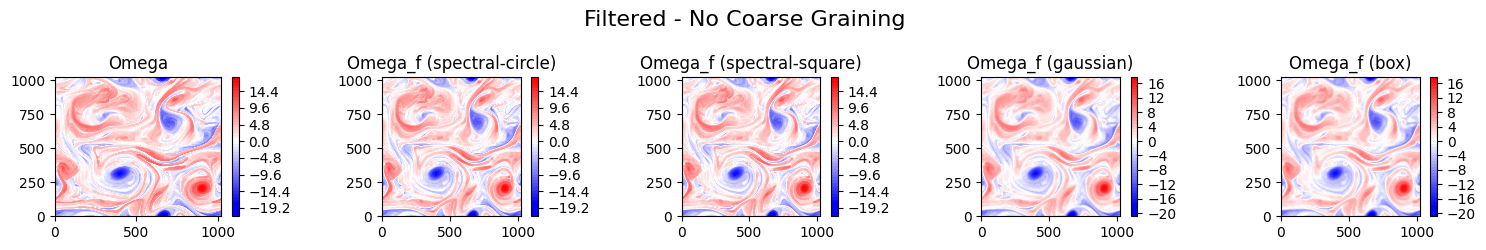

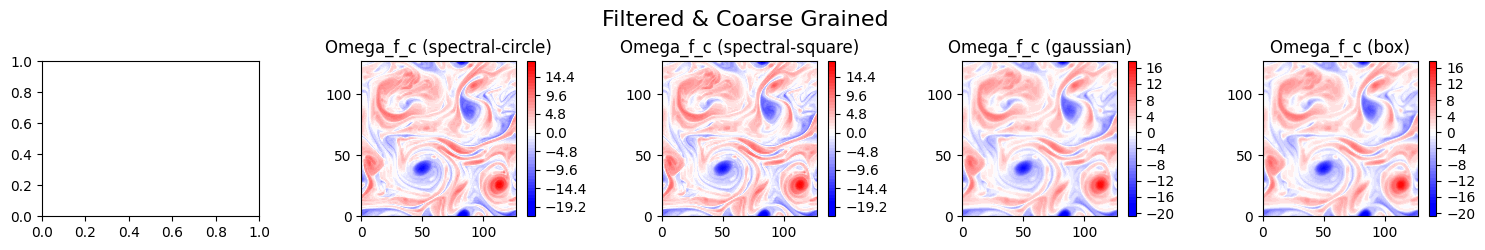

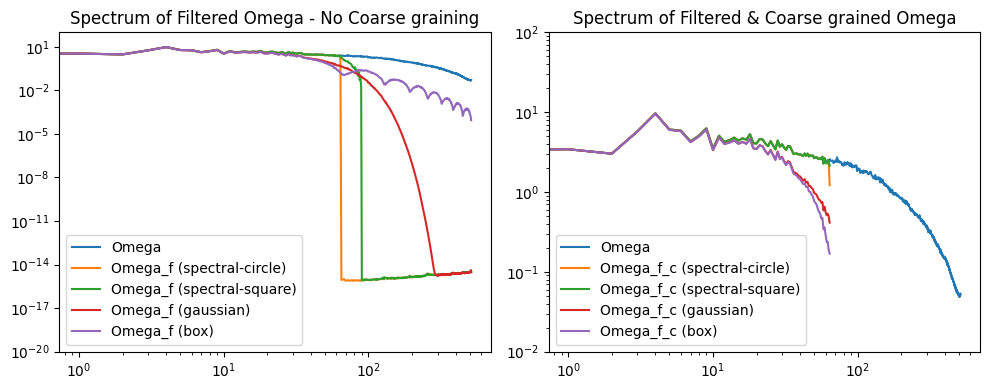

In [3]:
# Create a common colorbar range
vmax = Omega.max()
vmin = -vmax

# Initialize figure for contour
fig_contour, axs_contour = plt.subplots(1, len(filter_types) + 1, figsize=(15, 2.5))  # plus 1 for original Omega
fig_contour.suptitle('Filtered - No Coarse Graining', fontsize=16)

fig_contour_c, axs_contour_c = plt.subplots(1, len(filter_types) + 1, figsize=(15, 2.5))  # plus 1 for original Omega
fig_contour_c.suptitle('Filtered & Coarse Grained', fontsize=16)

# Initialize figure for spectrum
fig_spectrum, axs_spectrum = plt.subplots(nrows=1,ncols=2, figsize=(10, 4))

# Contour of original Omega
c = axs_contour[0].contourf(Omega, cmap='bwr', levels=50, vmax=vmax, vmin=vmin)
axs_contour[0].set_title('Omega')
fig_contour.colorbar(c, ax=axs_contour[0], orientation='vertical')

# Spectrum of Omega
axs_spectrum[0].loglog(wavenumbers_angled_Omega, spectrum_angled_Omega, label='Omega')
axs_spectrum[0].set_ylim([1e-20, 1e2])
axs_spectrum[1].loglog(wavenumbers_angled_Omega, spectrum_angled_Omega, label='Omega')
axs_spectrum[1].set_ylim([1e-2, 1e2])

kmax = 'grid'

# Contour and spectrum for each filter type
for i, filter_type in enumerate(filter_types):
    # Calculate filtered Omega
    Omega_f = filter2D_2DFHIT(Omega, filterType=filter_type, coarseGrainType=None, Delta=Delta, Ngrid=np.ones(2)*NCoarse)
    Omega_f_c = filter2D_2DFHIT(Omega, filterType=filter_type, coarseGrainType='spectral', Delta=Delta, Ngrid=np.ones(2)*NCoarse)

    # Contour of filtered Omega - No Coarse graining
    c1 = axs_contour[i + 1].contourf(Omega_f, cmap='bwr', levels=50, vmax=vmax, vmin=vmin)
    axs_contour[i + 1].set_title(f'Omega_f ({filter_type})')
    axs_contour[i + 1].set_aspect('equal')
    plt.colorbar(c1, ax=axs_contour[i + 1], orientation='vertical')

    # Contour of filtered Coarse grained Omega
    c2 = axs_contour_c[i + 1].contourf(Omega_f_c, cmap='bwr', levels=50, vmax=vmax, vmin=vmin)
    axs_contour_c[i + 1].set_title(f'Omega_f_c ({filter_type})')
    axs_contour_c[i + 1].set_aspect('equal')
    plt.colorbar(c2, ax=axs_contour_c[i + 1], orientation='vertical')

    # Calculate the absolute value of the Fourier transform of Omega_f and Omega_f_c
    Omega_f_abs_hat = np.sqrt(np.fft.fft2(Omega_f)*np.conj(np.fft.fft2(Omega_f)))
    Omega_f_c_abs_hat = np.sqrt(np.fft.fft2(Omega_f_c)*np.conj(np.fft.fft2(Omega_f_c)))

    # Calculate the spectrum using the spectrum_angled_average_2DFHIT function
    spectrum_angled_Omega_f, wavenumbers_angled_Omega_f = spectrum_angled_average_2DFHIT(Omega_f_abs_hat, spectral=True, kmax=kmax)
    spectrum_angled_Omega_f_c, wavenumbers_angled_Omega_f_c = spectrum_angled_average_2DFHIT(Omega_f_c_abs_hat, spectral=True, kmax=kmax)

    # Spectrum of filtered (Coarse-grained) Omega
    axs_spectrum[0].loglog(wavenumbers_angled_Omega_f, spectrum_angled_Omega_f, label=f'Omega_f ({filter_type})')
    axs_spectrum[1].loglog(wavenumbers_angled_Omega_f_c, spectrum_angled_Omega_f_c, label=f'Omega_f_c ({filter_type})')

    # axs_spectrum[0].axvline(x=NCoarse/2, color='red', linestyle='--')
    # axs_spectrum[1].axvline(x=NCoarse/2, color='red', linestyle='--')

# Set title and legend for spectrum plot
axs_spectrum[0].set_title('Spectrum of Filtered Omega - No Coarse graining')
axs_spectrum[0].legend()
axs_spectrum[1].set_title('Spectrum of Filtered & Coarse grained Omega')
axs_spectrum[1].legend()

# Layout adjustment
fig_contour.tight_layout()
fig_contour_c.tight_layout()
fig_spectrum.tight_layout()

# Display plots
plt.show()


In [4]:
# Testing coarse graining code # Comparing the outputs of JAX and numpy
from py2d.filter import coarse_spectral_filter_square_2DFHIT
from py2d.filter import coarse_spectral_filter_square_2DFHIT_jit
from py2d.spectra import spectrum_angled_average_2DFHIT

Ngrid = Omega.shape[0]
a = Omega
a_jit = jnp.asarray(a)

Ncoarse = Ngrid//2

a_temp = coarse_spectral_filter_square_2DFHIT(np.fft.fft2(a), Ncoarse)
a_coarse_jit_temp = coarse_spectral_filter_square_2DFHIT_jit(jnp.fft.fft2(a_jit), Ncoarse)

a_coarse = np.fft.ifft2(a_temp)
a_coarse_jit_temp2 = jnp.fft.ifft2(a_coarse_jit_temp)
a_coarse_jit = np.asarray(a_coarse_jit_temp2)

print("Testing if coarse grained JAX and numpy outputs are the same: ", np.allclose((a_coarse_jit), a_coarse))

a_spectral, ka = spectrum_angled_average_2DFHIT(np.sqrt(np.fft.fft2(a)*np.conj(np.fft.fft2(a))), spectral=True)
a_coarse_spectral, ka_coarse = spectrum_angled_average_2DFHIT(np.sqrt(np.fft.fft2(a_coarse)*np.conj(np.fft.fft2(a_coarse))), spectral=True)
a_coarse_spectral_jit, ka_coarse_jit = spectrum_angled_average_2DFHIT(np.sqrt(np.fft.fft2(a_coarse_jit)*np.conj(np.fft.fft2(a_coarse_jit))), spectral=True)

fig, axs = plt.subplots(1, 1, figsize=(10, 4))
axs.loglog(ka, a_spectral, label='Original')
axs.loglog(ka_coarse, a_coarse_spectral, label='Coarse grained Numpy')
axs.loglog(ka_coarse_jit, a_coarse_spectral_jit, '--', label='Coarse grained Jax')
# show labels
axs.legend()
axs.set_ylim([1e-2, 5e1])

NameError: name 'jnp' is not defined

In [ ]:
# Testing code which makes Nyqyist wavenumbers complex conjugates
from py2d.filter import conjugate_symmetrize_coarse
from py2d.filter import conjugate_symmetrize_coarse_jit
import jax.numpy as jnp

a = np.random.rand(4, 4) + 1j*np.random.rand(4, 4)
a_jit = jnp.asarray(a)

print(a.round(2))
b = conjugate_symmetrize_coarse(a)
b_jit = conjugate_symmetrize_coarse_jit(a_jit)

b_jit_np = np.asarray(b_jit)

# Assuming `a` is a numerical value
print("Nyquidt wavenumber is complex conjugate Numpy (:,{}), ({},:) \n{}".format(a.shape[0]//2, a.shape[0]//2, b.round(2)))
# Assuming `a` is a numerical value
print("Nyquidt wavenumber is complex conjugate Jax (:,{}), ({},:) \n{}".format(a.shape[0]//2, a.shape[0]//2, b_jit_np.round(2)))

#Test if the jax and numpy functions have same output
print("Jax and numpy functions have same output: ", jnp.allclose(b_jit_np, b))


[[0.86+0.15j 0.94+0.73j 0.36+0.42j 0.63+0.22j]
 [0.4 +0.67j 0.95+0.68j 0.45+0.67j 0.35+0.01j]
 [0.55+0.52j 0.61+0.69j 0.27+0.78j 0.54+0.49j]
 [0.22+0.07j 0.56+0.34j 0.11+0.84j 0.12+0.15j]]
Nyquidt wavenumber is complex conjugate Numpy (:,2), (2,:) 
[[0.86+0.15j 0.94+0.73j 0.36+0.j   0.63+0.22j]
 [0.4 +0.67j 0.95+0.68j 0.28-0.08j 0.35+0.01j]
 [0.55+0.j   0.58+0.1j  0.27+0.j   0.58-0.1j ]
 [0.22+0.07j 0.56+0.34j 0.28+0.08j 0.12+0.15j]]
Nyquidt wavenumber is complex conjugate Jax (:,2), (2,:) 
[[0.86+0.15j 0.94+0.73j 0.36+0.j   0.63+0.22j]
 [0.4 +0.67j 0.95+0.68j 0.28-0.08j 0.35+0.01j]
 [0.55+0.j   0.58+0.1j  0.27+0.j   0.58-0.1j ]
 [0.22+0.07j 0.56+0.34j 0.28+0.08j 0.12+0.15j]]
Jax and numpy functions have same output:  True
